In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../writes/shortpropdata.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
import joblib

model = LogisticRegression(max_iter=10000, random_state=42, verbose=1)
model.fit(X_train, y_train)
joblib.dump(model, 'logistic_regression_model.pkl')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          189     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  9.17677D+01

At iterate   50    f=  5.75626D-01    |proj g|=  4.89905D+00

At iterate  100    f=  5.71989D-01    |proj g|=  1.27570D+00

At iterate  150    f=  5.71100D-01    |proj g|=  1.30630D+00

At iterate  200    f=  5.70665D-01    |proj g|=  2.22148D+00

At iterate  250    f=  5.69616D-01    |proj g|=  9.34087D-01

At iterate  300    f=  5.68621D-01    |proj g|=  4.85026D-01

At iterate  350    f=  5.67997D-01    |proj g|=  9.66560D-01

At iterate  400    f=  5.67593D-01    |proj g|=  4.83862D-01

At iterate  450    f=  5.67084D-01    |proj g|=  1.48470D+00

At iterate  500    f=  5.66352D-01    |proj g|=  7.34468D-01

At iterate  550    f=  5.65619D-01    |proj g|=  5.94340D-01

At iterate  600    f=  5.65287D-01    |proj g|=  1.65307D+00

At iterate  650    f=  5.6

/Users/johnliu/Documents/vscode-workspace/lol-rivalry/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [4]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7129875047330556
Confusion Matrix:
[[1106  360]
 [ 398  777]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1466
           1       0.68      0.66      0.67      1175

    accuracy                           0.71      2641
   macro avg       0.71      0.71      0.71      2641
weighted avg       0.71      0.71      0.71      2641



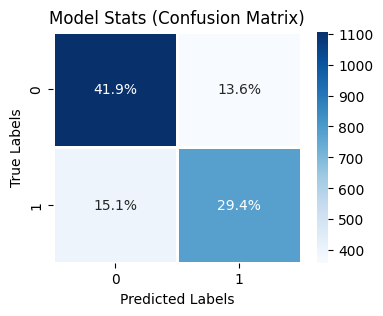

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidth=1., cmap='Blues', 
                 xticklabels=model.classes_, yticklabels=model.classes_)
total = 0
for t in ax.texts: total += float(t.get_text())
for t in ax.texts: t.set_text(f"{round(100 * float(t.get_text())/total, 1)}%")
plt.title(f'Model Stats (Confusion Matrix)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()